In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load the dataset
dataset, info = tfds.load('horses_or_humans', with_info=True, as_supervised=True)
train_data, test_data = dataset['train'], dataset['test']

In [4]:
# Show the number of training and testing images
print(f"Number of training images: {info.splits['train'].num_examples}")
print(f"Number of testing images: {info.splits['test'].num_examples}")

Number of training images: 1027
Number of testing images: 256


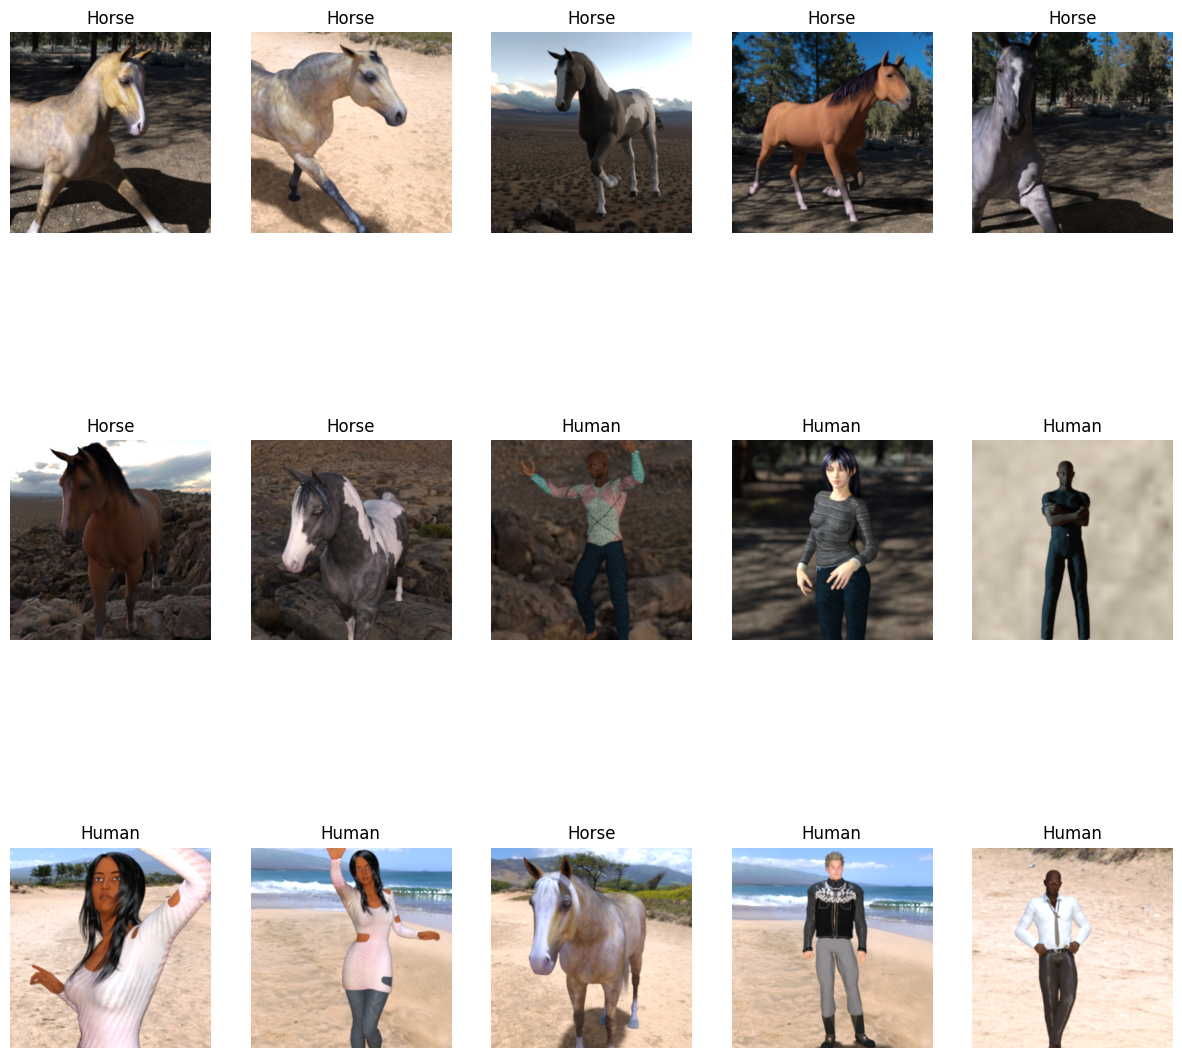

In [9]:

# Plot some images
def plot_images(dataset, num_images=15):
    plt.figure(figsize=(15, 15))
    for i, (image, label) in enumerate(dataset.take(num_images)):
        plt.subplot(3, 5, i+1)
        plt.imshow(image)
        plt.title('Horse' if label == 0 else 'Human')
        plt.axis('off')
    plt.show()

plot_images(train_data)

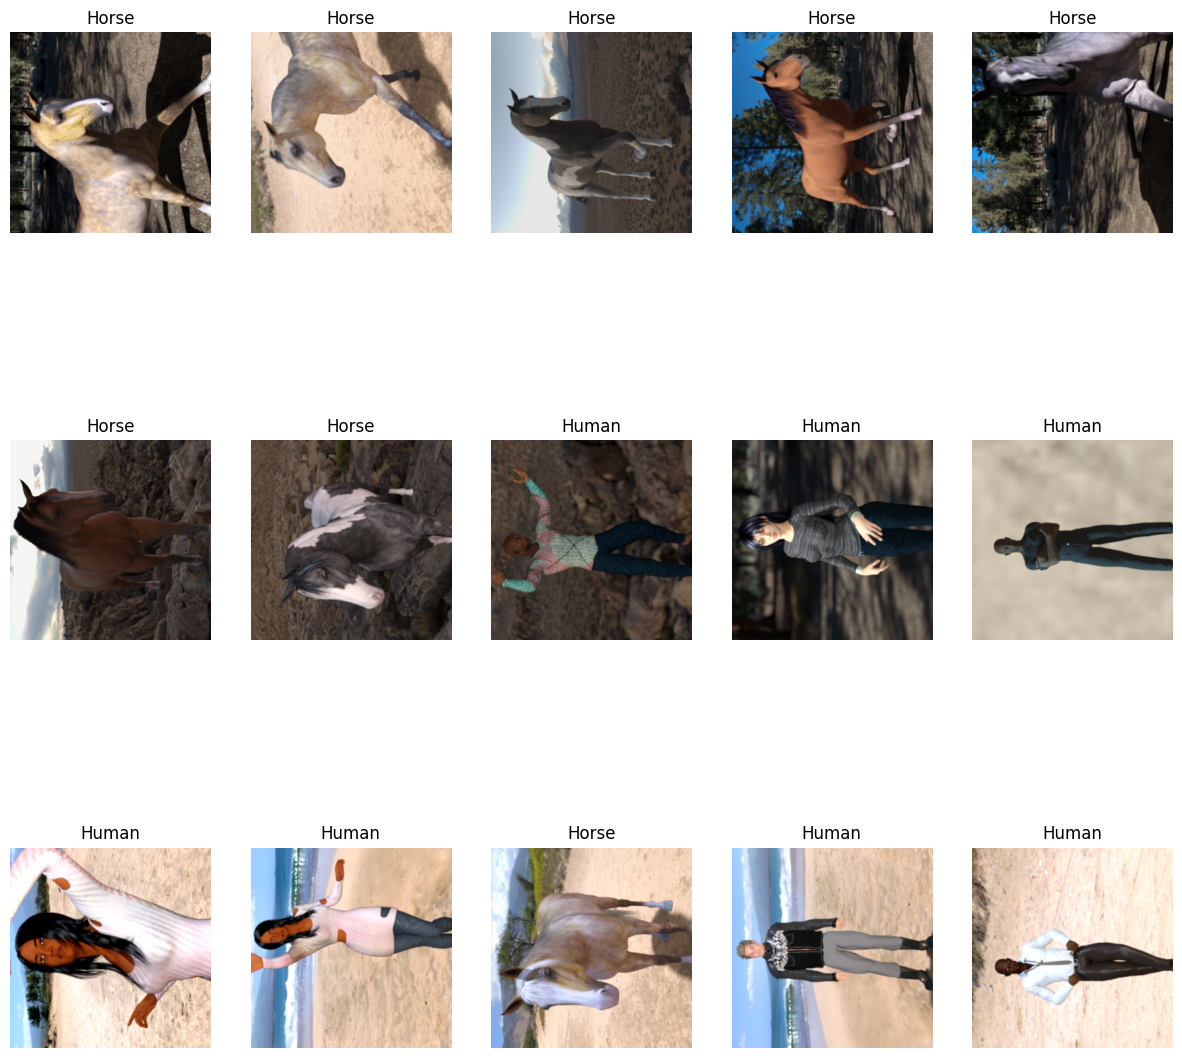

In [11]:
# Image Augmentation: contrast, flipping, and rotation
def augment_image(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
    image = tf.image.rot90(image)
    return image, label

augmented_train_data = train_data.map(augment_image).batch(32).prefetch(tf.data.AUTOTUNE)

# Plot augmented images
plot_images(augmented_train_data.unbatch(), )

In [14]:
num_augmented_images = sum(1 for _ in augmented_train_data.unbatch())
print(f"Number of augmented images: {num_augmented_images}")


Number of augmented images: 1027


In [15]:
# Normalize the data
def normalize_image(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_data = train_data.map(normalize_image).batch(32).prefetch(tf.data.AUTOTUNE)
test_data = test_data.map(normalize_image).batch(32).prefetch(tf.data.AUTOTUNE)

In [19]:
import tensorflow as tf

# Build a simplified CNN model with dropout
def build_cnn_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')  
    ])
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [20]:
# Train the CNN model on original data
cnn_model = build_cnn_model()
history_original = cnn_model.fit(train_data, epochs=5, validation_data=test_data)

Epoch 1/5
33/33 [==============================] - 43s 1s/step - loss: 2.4519 - accuracy: 0.7400 - val_loss: 0.6019 - val_accuracy: 0.8164
Epoch 2/5
33/33 [==============================] - 37s 1s/step - loss: 0.0796 - accuracy: 0.9737 - val_loss: 1.0060 - val_accuracy: 0.8008
Epoch 3/5
33/33 [==============================] - 35s 1s/step - loss: 0.0225 - accuracy: 0.9961 - val_loss: 1.4907 - val_accuracy: 0.8008
Epoch 4/5
33/33 [==============================] - 39s 1s/step - loss: 0.0072 - accuracy: 0.9981 - val_loss: 1.4323 - val_accuracy: 0.8242
Epoch 5/5
33/33 [==============================] - 39s 1s/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 2.1061 - val_accuracy: 0.8086


In [21]:
# Train the CNN model on augmented data
cnn_model_augmented = build_cnn_model()
history_augmented = cnn_model_augmented.fit(augmented_train_data, epochs=5, validation_data=test_data)

Epoch 1/5
33/33 [==============================] - 41s 1s/step - loss: 392.1593 - accuracy: 0.6865 - val_loss: 0.6846 - val_accuracy: 0.5430
Epoch 2/5
33/33 [==============================] - 41s 1s/step - loss: 2.3144 - accuracy: 0.7809 - val_loss: 0.7012 - val_accuracy: 0.3477
Epoch 3/5
33/33 [==============================] - 39s 1s/step - loss: 0.2715 - accuracy: 0.8958 - val_loss: 0.6996 - val_accuracy: 0.3594
Epoch 4/5
33/33 [==============================] - 39s 1s/step - loss: 0.1720 - accuracy: 0.9279 - val_loss: 0.7012 - val_accuracy: 0.2891
Epoch 5/5
33/33 [==============================] - 38s 1s/step - loss: 0.1364 - accuracy: 0.9328 - val_loss: 0.7005 - val_accuracy: 0.4766


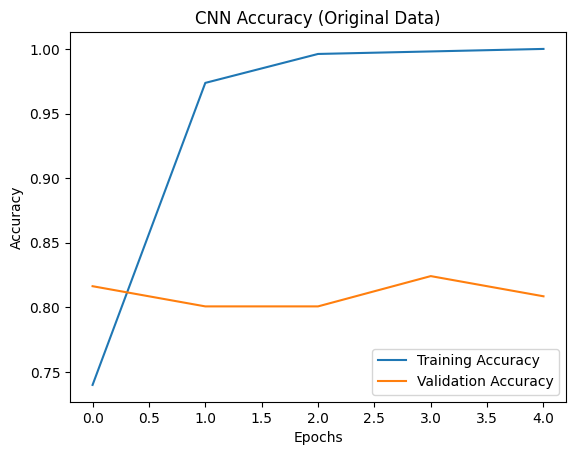

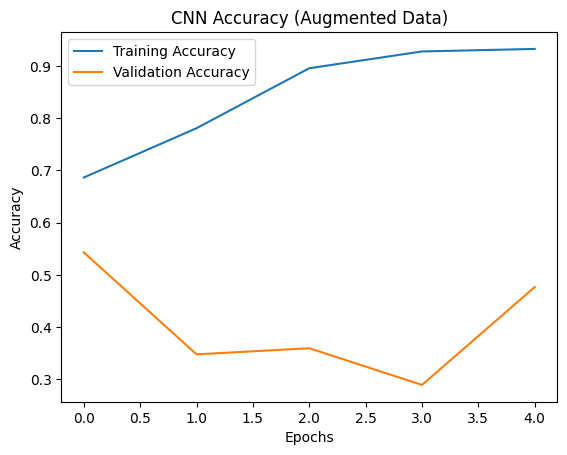

In [ ]:
# Plot accuracies
def plot_accuracies(history, title):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_accuracies(history_original, "Accuracy (Original Data)")
plot_accuracies(history_augmented, "Accuracy (Augmented Data)")

In [ ]:
# Compare Training and Testing Accuracy
original_acc = history_original.history['accuracy'][-1]
augmented_acc = history_augmented.history['accuracy'][-1]
original_val_acc = history_original.history['val_accuracy'][-1]
augmented_val_acc = history_augmented.history['val_accuracy'][-1]

print(f"Original Training Accuracy: {original_acc:.2f}, Validation Accuracy: {original_val_acc:.2f}")
print(f"Augmented Training Accuracy: {augmented_acc:.2f}, Validation Accuracy: {augmented_val_acc:.2f}")

Original Training Accuracy: 1.00, Validation Accuracy: 0.81
Augmented Training Accuracy: 0.93, Validation Accuracy: 0.48


: 